In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [9]:
cap = cv2.VideoCapture(1)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    

    # Display the resulting frame
    cv2.imshow('frame',hsv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.imwrite('reference_image.jpg', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
image = cv2.imread('images/pizza_bluescreen.jpg')

In [18]:
image_copy = cv2.cvtColor(cv2.imread('images/reference_image.jpg'), cv2.COLOR_BGR2HSV)

In [19]:
%matplotlib inline

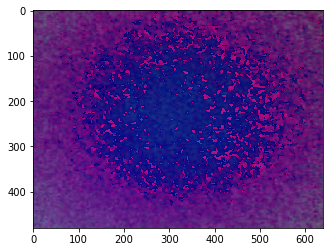

In [20]:
plt.imshow(image_copy)

### Define the color threshold

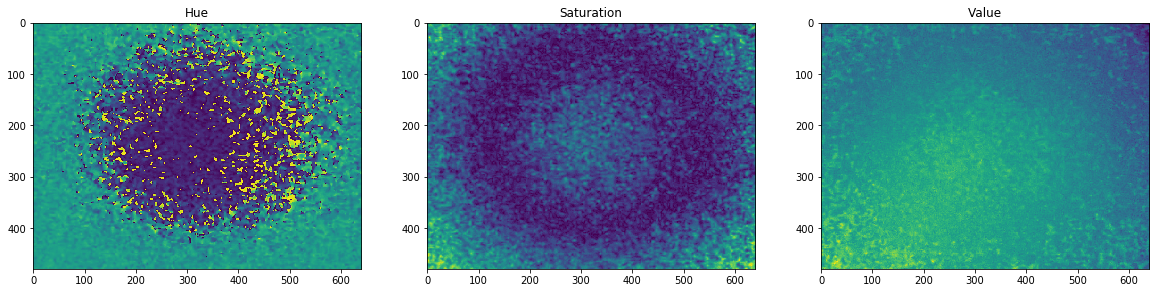

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (20, 6.6666666666))
ax1.set_title('Hue')
ax1.imshow(image_copy[:,:,0])

ax2.set_title('Saturation')
ax2.imshow(image_copy[:,:,1])

ax3.set_title('Value')
ax3.imshow(image_copy[:,:,2])

In [31]:
mi = image_copy[:,:,2].min()
ma = image_copy[:,:,2].max()
lower_value = np.array([0, 0, mi])
upper_value = np.array([180, 255, ma])


### Create a mask

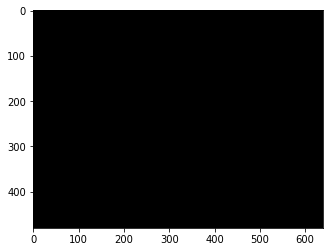

In [32]:
mask = cv2.inRange(image_copy, lower_value, upper_value)
plt.imshow(mask, cmap = 'gray')

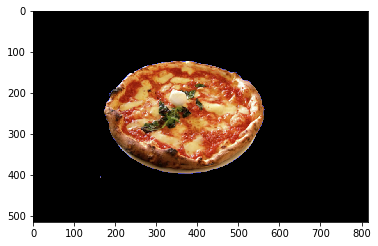

In [97]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0,0,0]
plt.imshow(masked_image)

In [98]:
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[0:image_copy.shape[0], 0: image_copy.shape[1]]

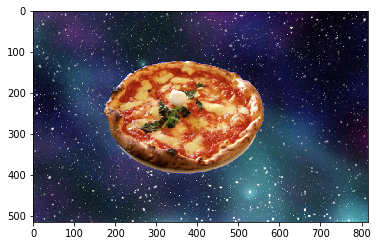

In [99]:
crop_background[mask == 0] = [0,0,0]
final_image = crop_background + masked_image
plt.imshow(final_image)